# Zombie-apokalypse Alexandria Washington D.C (Johanna og Øydis)

## Situasjonsbeskrivelse

Vi er i landsbyen Alexandria som ikke ligger langt unda Washington DC. I byen bodde det omtrentlig 160 000 mennesker før det farlige viruset begynte å spre seg. Viruset gjorde mennesker om til zombier ved at de ble smittet via blodet f.eks av å bli bitt eller klort. 

I dag er Alexandria blitt en safe-zone for zombiene. Det bor 500 mennesker der, og de har et gjerde rundt hele byen som beskytter dem. De må likevel ut for finnne nye ressurser, og hjelpe andre som trenger det. Det er heldigvis en elv (Potomac) som renner gjennom byen, men det er fortsatt behov for andre ressurser som mat og medisiner.

## Hensikten
Hensikten med denne oppgaven er å programmere en modell som viser hvordan to populasjoner vil påvirke hverandre ut i fra ulike forrutsetninger. Vi vil ta med nye faktorer inn i programmet litt etter litt slik at det blir mulig å se hvordan de påvirker populasjonene. 

## Oppgave 1

Forklaring fødselsrate (vi har kalt denne for vekstrate gjennom programmet. Vi innser at det ikke er helt rikitg bruk av begrepet.): Vi har funnet at i 2009 økte den amerikanske populasjonen med 13,8‰ i året (Infoplease, 2019). Vi bruker denne statistikken som grunnlag for valget vårt av vekstrate. Vi antar altså at populasjonen vår med 500 mennesker øker med 0,115% i måneden (1,38%/12). 


Forklaring invandringsrate: For å finne et tall for hvor mange vi tror ville invandrere til Alexandria tok vi utgangspunkt i hvor mange som innvandret til Hellas under flyktingskrisen i 2015. I 2015 kom det cirka 850 000 flyktninger til Hellas. Hellas er likevel et mye større område enn Alexandria i USA derfor fant vi ut hvor mange flyktninger det kom per kvadratmeter. Hellas er 131 957 km², derfor delte vi antall flykninger på arealet til Hellas. Antall flyktinger per kvadratmeter i året ble 6,44. Arealet til Alexandria er 39,75 km². 6,44*39,75 = 256 dette blir da 21,3 personer i måneden vi synes likevl dette virket litt så vi ganget det med 2 og får 43 flyktninger. Dette er veksten vi får de første 6 månedene. Vi tar 43/500 og finner innvandringsraten i prosent.

Vi tok utgangspunkt i Hellas under flyktningskrisen i 2015 da vi fant start innvandringsraten, så vi brukte også Hellas som utgangspunkt for å finne den nedre innvandringsraten. I 2017 var innvandringsraten 1,04% i Hellas (Eurostat, 2019). Vi brukte vekstfaktor for å finne hvor mye prosenten sank hver måned mellom 2015 og 2017. Vi fikk da likningen 8.6*x^24=1,04 -> x = 0,916 som betyr at prosenten (8,6) sank med cirka 10% i måneden.

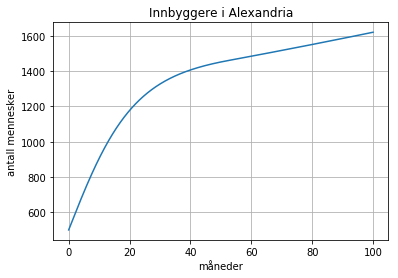

In [541]:
from pylab import*

#Tidsintervaller
N = 100000 #antall intervaller
tid = 100 #antall måneder
t0 = 0 #Start tid
dt = (tid-t0)/N

# Lister
m = [] #antall mennesker i Alexandria
t = [] #tid i måneder

#Initialbetingelser
m.append(500) #starter med 500 mennesker
t.append(0)

#Konstanter for mennesker
vr = 0.00115 #vekstrate i prosent per måned
ir = 0.086 #Innvandringsrate ved starten 
ir_slutt = 0.00104 #Innvandringsrate over tid. Det den vil stabilisere seg på
e_ir = 1-(0.084*(dt)) #endringen i ir slik at det blir omtrent 10% i måneden
mennesker = 500 #Antall mennesker ved start

#Funksjon for antall mennesker
def am(i): #Antall mennesker
    antall_m = m[i]+(vr+ir)*m[i]*dt
    mennesker = antall_m #antall mennesker
    m.append(mennesker)#Antall innbyggere i Alexandria 
    return 

#Eulers metode
for i in range(N-1):
    if m[i]>300000:#Grafene blir uleslige når de kommer mye over 300 000 mennesker 
        break
    elif m[i]<1:
        print("Menneskene er utryddet")
        break
    else:
        if ir>ir_slutt: #Hvis ir er større enn ir_slutt 
            ir*=e_ir
            am(i) #Antall mennesker
            t.append(t[i]+dt) #Tid      
        else:
            ir = ir_slutt #Setter ir lik ir_slutt
            am(i) #Antall mennesker
            t.append(t[i]+dt) #Tid 


#Plotting
title('Innbyggere i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t,m)
grid()
show()


        


### Kommentar grafen

Igrafen er det bare innvandrere og nyfødte som påvirker menneskepopulasjonen. I starten av grafen øker populasjonen kraftig, men etterhvert ( rundt måned 40) jevner den seg litt mer ut. Grunnen til dette er at innvandringsraten synker med tiden.

## Oppgave 2

Bæreevne:
Vi har valgt en bæreevne på 250 000 mennesker fordi det bor 160 000 i Alexandria i dag, og vi tenker at hvis det er krise så kan de kanskje klare å presse inn 90 000 over det det er plass til i dag (hvis folk bosetter seg i kjøpesentre osv). Vi antar også at de kan skaffe mat utenifra for det blir neppe produsert mye mat i Alexandria da det er mye vei og asfalt og sånt der. 

Faktorer som påvirker bæreevnen:

Tilgang til mat:
Hvis det ikke er nok mat vil det oppstå hungersnød og mange vil død. I tillegg hvis det er for lite kan ikke kvinner reprodusere og vekstraten vil synke.

Plass:
For lite plass før til at sykdommer spres fortere, og gjør at det er mindre plass for å dyrke mat. I tillegg kan mangel på plass føre til konkurranse innad i befolkningen som kan føre til at noen blir drept eller at det blir dannet grupper/klaner. Dette kan føre til at man ikke hjelper hverandre.

Sykdom:
Uten medisiner og leger vil flere død av sykdommer. I tillegg hvis det er dårlige sanitære forhold så blir folk fortere smittet. Skittent vann kan også føre at mange blir syke og sykdommer spres fort.


Konkurranse/krig:
For mange mennesker kan føre til krangel om ressurser og "borgerkriger" innad i Alexandria som kan gjøre at flere dør. I tillegg kan urolige omstendigheter (zombie apokalypse i dette tilfellet) føre til at folk ikke reproduserer seg.



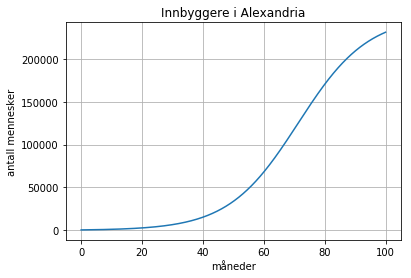

In [542]:
# Lister
m2 = [] #antall mennesker i Alexandria (inkludert bæreevne)
t2 = [] #tid i måneder (inkludert bæreevne)

#Tidsintervaller
N = 100000 #antall intervaller
tid = 100

#Konstanter
b = 250000 #bærevne i antall
ir = 0.086 #Innvandringsrate ved starten 

#Initialbetingelser
m2.append(500) #starter med 500 mennesker
t2.append(0)

#Funksjon for antall mennesker
def am(i): #Antall mennesker
    antall_m =  m2[i]+(vr+ir)*m2[i]*(1-(m2[i]/b))*dt
    mennesker = antall_m #antall mennesker
    m2.append(mennesker)#Antall innbyggere i Alexandria 
    return 

#Eulers metode
for i in range(N-1):
    if m2[i]>300000:#Grafene blir uleslige når de kommer mye over 300 000 mennesker 
        break
    elif m2[i]<1:
        print("Menneskene er utryddet")
        break
    else:
        if ir>ir_slutt: #Hvis ir er større enn ir_slutt 
            am(i) #Antall mennesker
            t2.append(t2[i]+dt) #Tid      
        else:
            ir = ir_slutt #Setter ir lik ir_slutt
            am(i) #Antall mennesker
            t2.append(t2[i]+dt) #Tid 
        
#plotting
title('Innbyggere i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t2,m2)
grid()
show()

### Kommentar til grafene

Menneskepopulasjonen har en eksponentiellvekst. I starten stiger populasjonen sakte, men etter vert øker den mye hver måned. Når populasjonen når bæreevnen, som ligger på 250000 mennesker, begynner grafen å slakke litt ned og etterhvert vil den stabilisere seg på bæreevnen.

## Oppgave 3

Forklaring dødsraten og spedbarnsdødlighet: Vi fant at dødsraten i USA per 2017 var 849,3 per 100 000 (0,85%). Denne inkluderer både sykdommer og skader i tillegg til naturlig død. I tillegg til dødsraten så var spedbarnsdødligheten på 5,87 per 1000 (0,6%). (CDC, 2017).

Siden det er en zombie apokalypse kommer mest sannsynlig både dødsraten og spedbarnsdødligheten til å øke på grunn av mangel på leger, rent vann, mat og medisiner. I tillegg sprer sykdommer seg fortere hvis det er mange på et lite sted. Mangel på rene sanitærområder kan også føre til økt dødsrate.

Vi øker dødsraten på grunn av dette. Denne høyeste dødsraten i verden er i Lesotho i Afrika og er omtrent på 1,5% (per 2017)(CIA, 2017). Vi øker dermed ikke dødsraten så høyt men legger den rundt 1,2%. Den høyeste spedbarnsdødligheten per 2017 var på 4,4% i Pakistan (FN, 2017). Vi øker den mer enn dødsraten da vi tror mangel på leger, medisiner og renslighet vil påvirke denne mer enn dødsraten fordi spedsbarnsdødligheten øker mye når det er krig og mangel på ressurser. Vi setter dermed spedbarnsdødligheten til 3,0%.

Vi forandret nå på vekstraten. Siden vi legger til dødsrate og spedbarnsdødlighet vil populasjonen vår synke i starten og øke veldig sakte etterhvert. I bakgrunn for både dødsraten og spedbarnsdødligheten antar vi at det er mangel på diverse nødvendigheter dermed antar vi også at det blir mangel på prevansjonsmidler. Vi tok utgangspunkt i Pakistan for spedbarnsdødligheten dermed tok vi utgangspunkt i deres vekstrate (egt kalt fødselsrate) som er på 2,8% (Trading Economics, 2016).

Vi antar også at det bare er de som allerede som bor der som kan dø. De som innvandrer vil ikke innvandre hvis er døde og de nyfødte har vi spedbarnsdødligheten på.

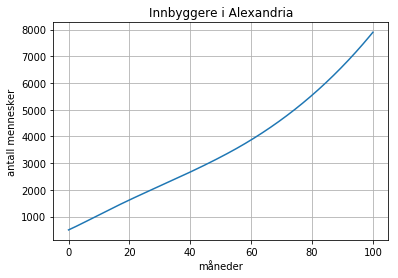

In [543]:
# Lister
m3 = [] #antall mennesker i Alexandria (inkludert bæreevne og død)
t3 = [] #tid i måneder (inkludert bæreevne og død)

#Tidsintervaller
N = 100000 #antall intervaller
tid = 100

# Konstanter for menneskene
vr = 0.028 #Ny vekstrate i prosent per måned
ir = 0.086 #Innvandringsrate ved starten 

# Initialbetingelser
m3.append(500) #starter med 500 mennesker
t3.append(0)

#Funksjon for antall mennesker
def am(i): #Antall mennesker
    antall_m =  m3[i]+(((vr*sd+ir)*m3[i]*(1-(m3[i]/b)))-m3[i]*dr)*dt
    mennesker = antall_m #antall mennesker
    m3.append(mennesker)#Antall innbyggere i Alexandria 
    return 


#Eulers metode
for i in range(N-1):
    if m3[i]>300000:#Grafene blir uleslige når de kommer mye over 300 000 mennesker 
        break
    elif m3[i]<1:
        print("Menneskene er utryddet")
        break
    else:
        if ir>ir_slutt: #Hvis ir er større enn ir_slutt 
            ir*=e_ir
            am(i) #Antall mennesker
            t3.append(t3[i]+dt) #Tid      
        else:
            ir = ir_slutt
            am(i) #Antall mennesker
            t3.append(t3[i]+dt) #Tid 

        
#plotting
title('Innbyggere i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t3,m3)
grid()
show()



### Kommentar til grafene

I denne grafen er det også blitt tatt med at menneskene kan dø av blant annet sykdom, skader og alderdom, vi har også inkludert spedbarnsdødelighet. Det gjør at populasjonen øker mere jevnt og  er mer lineær enn det de andre grafene er hvor menneskepopulasjonen øker kraftig.

## Oppgave 4

Vi antar at de som dør er de som går ut av campen for å skaffe noe mat eller andre ressurser. Vi antar altså at alle som er inne i campen ikke blir drept av zombiene (det er en safe zone). Vi antar at 1% dør av zombiene i måneden. Etterhvert som det blir flere mennesker trenger de flere ressurser så flere må dra ut og da vil det dø flere i antall (prosenten vil forbli den samme). Vi valgte 1% fordi det virka logisk og det så realistisk ut. 

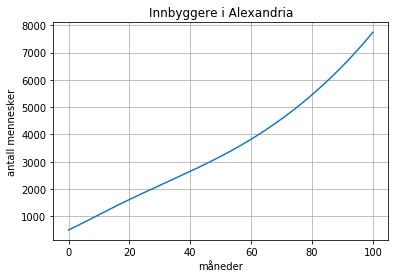

In [544]:
# Lister
m4 = [] #antall mennesker i Alexandria (inkludert bæreevne, død og zombiedød)
t4 = [] #tid i måneder (inkludert bæreevne, død og zombiedød)

# Tidsintervaller
N = 100000 #antall intervaller
tid = 100 #antall måneder


#Konstanter for mennesker
zr = 0.0002 #"zombierate" aka hvor mange som dør av zombiene i prosent
ir = 0.086 #Innvandringsrate ved starten 

#Konstanter for zombiene
zombier = 100 #Antall zombier ved tid 0


#Initialbetingelser
m4.append(500) #starter med 500 mennesker
t4.append(0)

#Funksjon for antall mennesker
def am(i): #Antall mennesker
    antall_m = m4[i]+((m4[i]*(vr*sd+ir)*(1-(m4[i]/b)))-m4[i]*(dr+zr))*dt
    mennesker = antall_m #antall mennesker
    m4.append(mennesker)#Antall innbyggere i Alexandria 
    return 



#Eulers metode
for i in range(N-1):
    if m4[i]>300000:#Grafene blir uleslige når de kommer mye over 300 000 mennesker 
        break
    elif m4[i]<1:
        print("Menneskene er utryddet")
        break
    else:
        if ir>ir_slutt: #Hvis ir er større enn ir_slutt 
            ir*=e_ir
            am(i) #Antall mennesker
            t4.append(t4[i]+dt) #Tid      
        else:
            ir = ir_slutt
            am(i) #Antall mennesker
            t4.append(t4[i]+dt) #Tid 


        
#plotting
title('Innbyggere i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t4,m4)
grid()
show()




### Kommentar til grafene
Nå kan menneskene også bli drept av zombier. Dette gjør at menneskepopulasjonen øker litt saktere enn det den gjør i oppgave 3, men er også nesten helt lineær.

## Oppgave 5

Vi har antatt 0,01% blir drept av zombiene og at 0,01% blir til zombier. I forrige oppgave ble 0,02% drept av zombiene så nå har vi antatt at halvparten av disse blir til zombier istedenfor.

Menneskene er utryddet


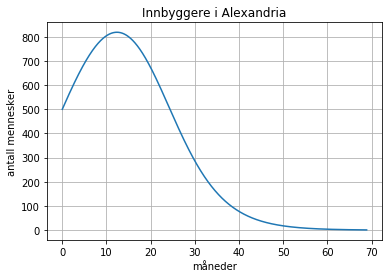

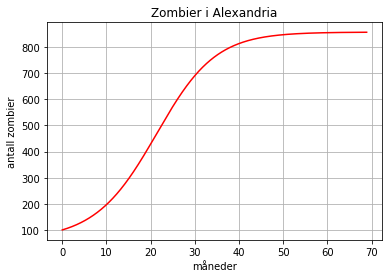

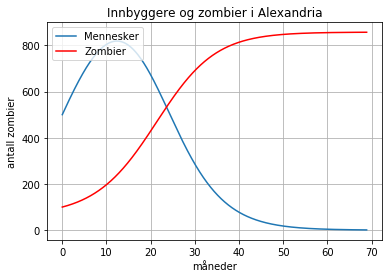

In [545]:

# Lister
m5 = [] #antall mennesker i Alexandria (inkludert bæreevne, død og zombiedød)
t5 = [] #tid i måneder 
z5 = [] #antall zombier i Alexandria

#Tidsintervaller
N = 100000 #antall intervaller
tid = 100 #antall måneder

#Konstanter for menneskene
ir = 0.086 #Innvandringsrate ved starten 

#Konstanter for zombier
zr = 0.0001 #"zombierate" aka hvor mange som dør av zombiene i prosent
nz = 0.0001 #nye zombier i prosent 

#Initialbetingelser
m5.append(500) #starter med 500 mennesker
t5.append(0)
z5.append(100) #starter med 100 zombier


#Funksjoner for antall mennesker og zombier
def am(i): #Antall mennesker
    antall_m = m5[i]+(m5[i]*(vr*sd+ir)*(1-(m5[i]/b))-m5[i]*(dr+(zr+nz)*z5[i]))*dt
    mennesker = antall_m #antall mennesker
    m5.append(mennesker)#Antall innbyggere i Alexandria 
    return 

def az(i): #Antall zombier
    antall_z = z5[i]+(m5[i]*z5[i]*nz)*dt
    zombier = antall_z
    z5.append(zombier) 
    return 

#Eulers metode
for i in range(N-1):
    if m5[i]>300000 or z5[i]>300000:#Grafene blir uleslige når de kommer noe over 300 000 mennesker eller zombier
        break
    elif m5[i]<1:
        print("Menneskene er utryddet")
        break
    elif z5[i]<1:
        print("zombiene er utryddet")
        break
    else:
        if ir>ir_slutt: #Hvis ir er større enn ir_slutt 
            ir*=e_ir
            am(i) #Antall mennesker
            t5.append(t5[i]+dt) #Tid 
            az(i) #Antall zombier        
        else:
            ir = ir_slutt
            am(i) #Antall mennesker
            t5.append(t5[i]+dt) #Tid 
            az(i) #Antall zombier


        

#plotting

#Mennesker
title('Innbyggere i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t5,m5)
grid()
show()

#Zombier
title('Zombier i Alexandria')
xlabel('måneder')
ylabel('antall zombier')
plot(t5,z5, 'r')
grid()
show()

#Begge
title('Innbyggere og zombier i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t5,m5,label='Mennesker')

xlabel('måneder')
ylabel('antall zombier')
plot(t5,z5, 'r',label='Zombier')

legend(loc='upper left')
grid()
show()


### Kommentar til grafene

Her kan menneskene også bli gjort om til zombier, slik at zombiepopulasjonen øker. Menneskene kan ennå ikke drepen zombiene, derfor blir menneskene utryddet imens zombiene ikke blir det. I grafen hvor både menneskepopulasjonen er og zombiepopulasjonen kan du se at etter grafene krysser hverandre fortsetter zombiene å stige mens menneskene går mot 0. Zombiene får overtak over menneskene i og med at de ikke kan dø.

## Oppgave 6

Nå kan menneskene også drepe zombiene. Vi beholder alle de samme tallene som i oppgave 5, men legger til en "drepe zombie" rate. Altså en rate som sier noe om hvor mange zombier menneskene dreper. Vi valgte å sette denne til halvparten av det zombiene klarer å omgjøre mennesker til zombier (eller 1/4 av raten zombier tar mennesker i). Årsaken til valget er at hvis vi setter raten det blir nye zombier og raten zombier blir drept i til å være like store så vil zombiegrafen ha null stigning. Hvis "drepe zombie" raten er større så synker zombiegrafen med en gang ned mot null.

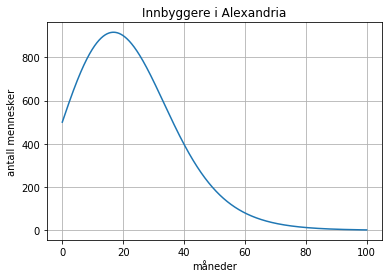

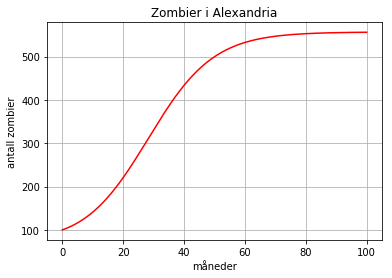

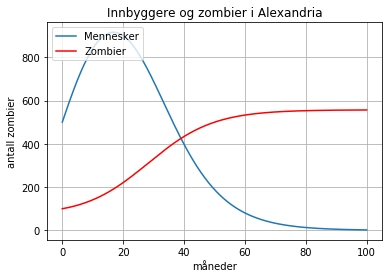

In [546]:
# Lister
m6 = [] #antall mennesker i Alexandria (inkludert bæreevne, død og zombiedød)
t6 = [] #tid i måneder 
z6 = [] #antall zombier i Alexandria

#Konstanter
N = 100000 #antall intervaller
tid = 100 #antall måneder

#Konstanter for menneskene
dz = 0.00005 #"drepe zombie rate" aka antall zombier som blir drept i prosent
ir = 0.086 #Innvandringsrate ved starten 

#Konstanter for zombier
zr = 0.0001 #"zombierate" aka hvor mange som dør av zombiene i prosent
nz = 0.0001 #nye zombier i prosent 

#Initialbetingelser
m6.append(500) #starter med 500 mennesker
t6.append(0)
z6.append(100) #starter med 100 zombier


#Funksjoner for antall mennesker og zombier
def am(i): #Antall mennesker
    antall_m = m6[i]+((vr*sd+ir)*m6[i]*(1-(m6[i]/b))-m6[i]*(dr+(zr+nz)*z6[i]))*dt
    mennesker = antall_m #antall mennesker
    m6.append(mennesker)#Antall innbyggere i Alexandria 
    return 

def az(i): #Antall zombier
    antall_z = z6[i]+(m6[i]*z6[i]*nz-m6[i]*z6[i]*dz)*dt
    zombier = antall_z
    z6.append(zombier) 
    return 



#Eulers metode
for i in range(N-1):
    if m6[i]>300000 or z6[i]>300000:#Grafene blir uleslige når de kommer mye over 300 000 mennesker eller zombier
        break
    elif m6[i]<1:
        print("Menneskene er utryddet")
        break
    elif z6[i]<1:
        print("zombiene er utryddet")
        break
    else:
        if ir>ir_slutt: #Hvis ir er større enn ir_slutt 
            ir*=e_ir
            am(i) #Antall mennesker
            t6.append(t6[i]+dt) #Tid 
            az(i) #Antall zombier        
        else:
            ir = ir_slutt
            am(i) #Antall mennesker
            t6.append(t6[i]+dt) #Tid 
            az(i) #Antall zombier


#plotting

#Innbyggere
title('Innbyggere i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t6,m6,)
grid()
show()

#Zombier
title('Zombier i Alexandria')
xlabel('måneder')
ylabel('antall zombier')
plot(t6,z6,'r')
grid()
show()

#Begge
title('Innbyggere og zombier i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t6,m6,label='Mennesker')

xlabel('måneder')
ylabel('antall zombier')
plot(t6,z6,'r',label='Zombier')

legend(loc='upper left')
grid()
show()






### Kommentar til grafene

I starten øker både antall mennesker og zombier. Både menneskene og zombiene nesten fordobler seg i løpet av de første 20 måndene. Etter dette så begynner antall mennesker å synke igjen. Etter 20 månder til krysser menneske- og zombiegrafen hverandre. Etter dette fortsetter menneskene å synke ned mot null mens zombiene fortsetter å øke i antall. Det kan være flere årsaker til at menneskene begynner å synke i antall ved måned 20. En årsak er at innvandringen synker over tid, og en annen er at når det blir flere mennesker og zombier så er det flere mennesker som blir drept/omgjort av zombiene. Dette kan føre til at zombiene får et overtak da de ikke kan dø noe som fører til at det fortsatt er en del mennesker som blir drept selvom det ikke er så mange mennesker igjen.

## Oppgave 7

På grunn av forsterkninger fra landsbyene Hilltop og Kingdom påvirker dette flere faktorer som innvandringsrate, dødsrate, spedbarnsdødlighet og antall zombier som dør. Vi økte ir_slutt altså den raten vi tror innvandringen vil stabilisere seg på. Vi økte den til 0,01 fordi det er dette som var innvandringsraten i Norge i 2018 (SSB, 2018). I tillegg tror vi mennesker fra landsbyene vil komme våpen og hjelpe med å drepe zombier. Derfor økte vi "drepe zombie" raten litt.Vi tror også at de kan komme med medisiner, leger og mat. Dermed senket vi dødsraten og spedbarnsdødligheten.

Vi velger fortsatt å holde "drepe zombie" raten lavere enn "nye zombier" raten for at ikke zombiene skal bli utyddet med en gang.

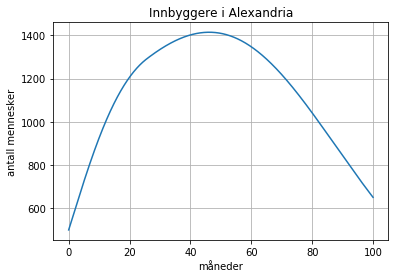

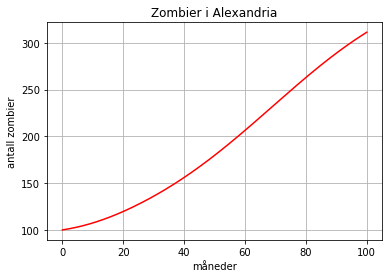

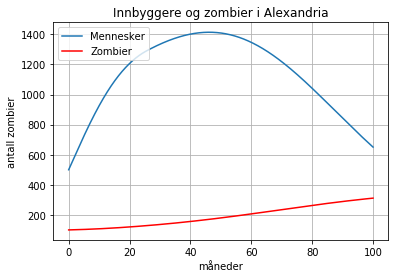

In [547]:
# Lister
m7 = [] #antall mennesker i Alexandria (inkludert bæreevne, død og zombiedød)
t7 = [] #tid i måneder 
z7 = [] #antall zombier i Alexandria

#Konstanter
N = 100000 #antall intervaller
tid = 100 #antall måneder

#Konstanter for menneskene
dr = 0.01 #dødsrate 
sd = 1-0.02 #spedbarnsdødligheten i prosent/antallet som overlever
vr = 0.035 #Ny vekstrate i prosent per måned
dz = 0.00009 #"drepe zombie" rate aka antall zombier som blir drept i prosent
ir = 0.086 #Innvandringsrate ved starten 
ir_slutt = 0.01 #Innvandringsrate over tid. Det den vil stabilisere seg på

#Konstanter for zombier
zr = 0.0001 #"zombierate" aka hvor mange som dør av zombiene i prosent
nz = 0.0001 #nye zombier i prosent 

#Initialbetingelser
m7.append(500) #starter med 500 mennesker
t7.append(0)
z7.append(100) #starter med 100 zombier


#Funksjoner for antall mennesker og zombier
def am(i): #Antall mennesker
    antall_m = m7[i]+(((vr*sd+ir)*m7[i]*(1-(m7[i]/b)))- m7[i]*(dr+(zr+nz)*z7[i]))*dt
    mennesker = antall_m #antall mennesker
    m7.append(mennesker)#Antall innbyggere i Alexandria 
    return 

def az(i): #Antall zombier
    antall_z = z7[i]+(m7[i]*z7[i]*nz-m7[i]*z7[i]*dz)*dt
    zombier = antall_z
    z7.append(zombier) 
    return 

    
#Eulers metode
for i in range(N-1):
    if m7[i]>300000 or z7[i]>300000: #Grafene blir uleslige når de kommer mye over 300 000 mennesker eller zombier
        break
    elif m7[i]<1:  #Sikkerhetsløkke som vi brukte for å stoppe løkken hvis menneskene ble utrydda
        print("Menneskene er utryddet")
        break
    elif z7[i]<1: #Sikkerhetsløkke som vi brukte for å stoppe løkken hvis zombiene ble utrydda
        print("zombiene er utryddet")
        break
    else:
        if ir>ir_slutt: #Hvis ir er større enn ir_slutt 
            ir *= e_ir #Innvandringsraten synker med cirka 10% slik at den går mot ir_slutt
            am(i) #Antall mennesker
            t7.append(t7[i]+dt) #Tid 
            az(i) #Antall zombier        
        else:
            ir = ir_slutt 
            am(i) #Antall mennesker
            t7.append(t7[i]+dt) #Tid 
            az(i) #Antall zombier



#plotting

#innbygere
title('Innbyggere i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t7,m7)
grid()
show()

#Zombier
title('Zombier i Alexandria')
xlabel('måneder')
ylabel('antall zombier')
plot(t7,z7,'r')
grid()
show()

#Begge
title('Innbyggere og zombier i Alexandria')
xlabel('måneder')
ylabel('antall mennesker')
plot(t7,m7,label='Mennesker')

xlabel('måneder')
ylabel('antall zombier')
plot(t7,z7,'r',label='Zombier')

legend(loc='upper left')
grid()
show()

### Kommentar til grafen

Her skjer det mye av det samme som skjedde i oppgave 6. Menneskene og zombiene øker i starten, men etter en stund (40 måneder) begynner menneskene å synke i antall. Tror dette igjen er på grunn av at når menneskene øker i antall så blir fler og fler drept/omgjort av zombiene. Til slutt får zombiene et overtak som gjør at menneskene fortsetter å bli drept i store tall selvom de blir færre. Her er det godt mulige at grafene ville fortsatt slik som i oppgave 6 hvis man så de over enda lengre tid. Altså at grafene til slutt ville krysset hverandre hvor menneskene fortsatt ned mot utryddning mens zombiene fortsetter å vokse.

## Konklusjon

Hensikten med forsøket var å se hvordan menneskene ble påvirket av ulike faktorer, og hvordan disse og zombiene påvirker hverandre. For å konkludere så går det ikke så bra for menneskepopulasjonen vår når zombiene kommer. De blir veldig få etterhvert som zombiene kan drepe dem og gjøre dem til zombier. Det hjelper dem litt å få forsterkninger fra andre landsbyer, men det bare utsetter noe som ser ut som en unungåelig utryddning. Vi får trøste oss med at det ikke (trolig) finnes zombier i virkeligheten.

Modellen vår hadde noen begresninger som gjorde vår allerede urealistiske hendelse mindre realistisk. Alle ratene vi valgte var i utgangspunktet empiriske. Fødselsraten var fra USA, innvandrigsrate var fra Hellas, spedbarnsdødligheten var fra Pakistan osv., men disse var ikke spesifkt for Alexandria i Virginia. En begresning var at vi baserte ratene våre på gjennomsnittlige empiriske rater. En annen begresning var at vi hadde med et utvalg av rater og ikke alle ratene som kanskje kunne ha vært nødvendige ble med. Det kan tenkes at mennesker ville oppført seg annerledes i et post-apokalyptisk samfunn, og at ratene ville sett helt annerledes ut f.eks kanskje de hadde fått flere/færre barn.

Med unntak av begrensningene til modellen er det også noen andre faktorer vi tror kan ha påvirket resultatene våre. Vi valgte enn veldig høy beærevene (250 000). Når vi kun startet med 500 menneskr var kanskje den bæreevnen litt stor. Vi ser i den siste grafen (oppgave 7) at det ikke ble mer enn 1400 mennesker før grafen begynte å synke. Da det kun var 1400 mennesker i populasjonen på det meste hadde bæreevnen liten betydning. Det kan tenkes at i en post-apokalyptisk verden så er en bæreevne på 250 000 i en by litt mye.

Vi hadde også en stor andel zombier i begynnelsen i forhold til mennesker. Dette førte til at i de siste oppgavene fikk zombiene fort overhånd og vokste seg store mens menneskepopulasjonen sank. Nå kan vi ikke vite om andelen zombier var urealistisk. Kanskje det var så stor andel zombier det ville vært om de kom, og kanskje menneskene ikke ville vart så lenge. Vi har ingenting å prøve svarene våre opp mot (ingen kjente eksempler som vi vet om i alle fall), så det er vanskelig å si i hvilken grad resultatene våre er realistiske. 

(PS: vi innser at N og tid er den samme hver gang så vi hadde ikke trengt å definere de i hver eneste oppgave, men vi beholdt de slik at vi kan variere tiden i de ulike oppgave for å se hvordan det forandret grafene.)


## Kildeliste
Infoplease. (2019). Live births and birth rates. Hentet fra https://www.infoplease.com/us/births/live-births-and-birth-rates-year


Eurostat. (2019). Migration and migrant population statistics. Hentet fra https://ec.europa.eu/eurostat/statistics-explained/index.php/Migration_and_migrant_population_statistics

CDC/National Center for Health Statistics. (2017). Deaths and Mortality. Hentet fra https://www.cdc.gov/nchs/fastats/deaths.htm

FN. (2017). Spedbarnsdødlighet. Hentet fra https://www.fn.no/Statistikk/Spedbarnsdoedelighet

Trading Economics. (2016). Pakistan - Birth rate, crude. Hentet fra https://tradingeconomics.com/pakistan/birth-rate-crude-per-1-000-people-wb-data.html

SSB. (2018). Innvandring. Hentet fra https://www.ssb.no/innvandring-og-innvandrere/faktaside/innvandring

CIA: (2017). COUNTRY COMPARISON :: DEATH RATE. Hentet fra https://www.cia.gov/library/publications/the-world-factbook/rankorder/2066rank.html#